Data need to be uploaded (+) or it is on Google Colab (-)? Answer(+/-): 
+


Saving 4grad.dat to 4grad.dat



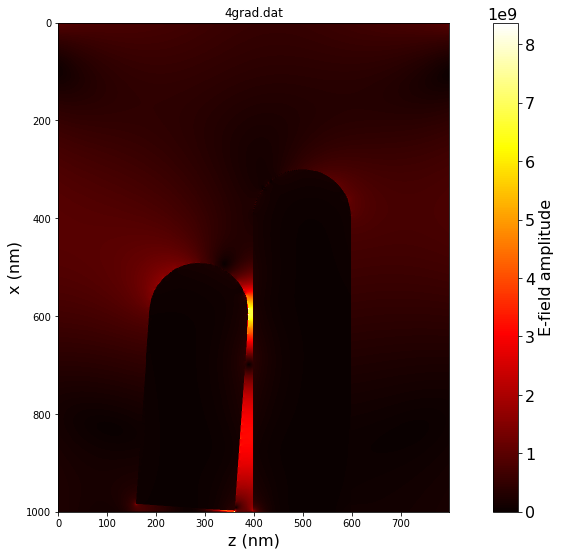

Max value for  4grad.dat  =  8.37e+09
To save picture press right button of mouse -> "Save as..."
Picture format is .png, it will be transparent
Is it needed to cut something out of the image? Answer(+/-): 
+
Enter the X where to start cutting the image from: 
200
Enter the X where to finish cutting the image: 
500
Enter the Y to start cutting the image from 
400
Enter the Y where to finish cutting the image: 
800


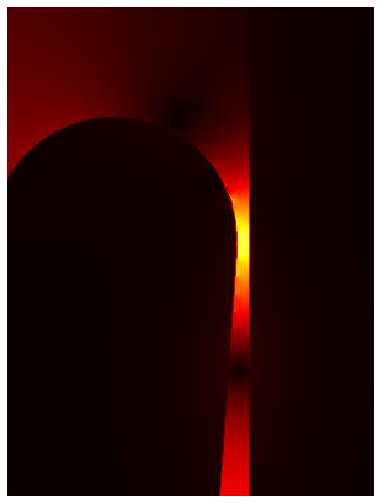

To save picture press right button of mouse -> "Save as..."
Picture format is .png, it will be transparent
Is it needed to cut something out of the image? Answer(+/-): 
+
Enter the X where to start cutting the image from: 
100
Enter the X where to finish cutting the image: 
700
Enter the Y to start cutting the image from 
200
Enter the Y where to finish cutting the image: 
400


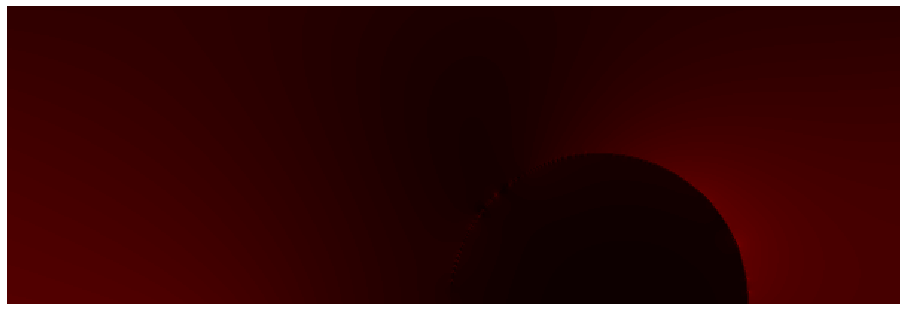

To save picture press right button of mouse -> "Save as..."
Picture format is .png, it will be transparent
Is it needed to cut something out of the image? Answer(+/-): 
-
The program is finished!


In [1]:
#@title <--- Press to run 	(ﾉ◕ヮ◕)ﾉ*:･ﾟ✧ { display-mode: "form" }

import matplotlib.pyplot as plt # Plotting
from google.colab import files # Work with files in Google Colab
import numpy as np # Arrays
import json # Work with files
import os # Work with directories and etc

if input('Data need to be uploaded (+) or it is on Google Colab (-)? Answer(+/-): \n') == '+':
  files.upload() # Uploading
  file_names = os.listdir() # List of files
  file_names = file_names[1:len(file_names)-1] # Only uploaded files
else:
  file_names = os.listdir() # List of files
  file_names = file_names[1:len(file_names)-1] # Only uploaded files

points = np.array([]) # Array of plotting points
perm = np.array([]) # Helping array
line_counter = 0 # Lines counter

for file_name in file_names: # Cycle along all files
  with open(file_name) as file:  
    for line in file: # Cycle along lines in files=
      line_counter += 1 # Counting lines
      if line_counter > 2: # Skip 3 first lines
        line = np.array(line.strip(' ').split()) # Splitting by spaces
        if line[0] == 'I=': # New line
          perm = perm.flatten() # 1D array
          if len(points) == 0: 
            points = np.append(points, perm) # Append if it is empty
          else:
            points = np.vstack((points, perm)) # Stack if not empty
          perm = np.array([]) # Nulling array
        else:
          line = line.astype(float) # Needed data type
          perm = np.append(perm, line) # Fill in helping array

    # Append last line
    perm = perm.flatten()
    if len(points) == 0:
      points = np.append(points, perm)
    else:
      points = np.vstack((points, perm))

    plt.figure(figsize=(16,9)) # Size of picture
    plt.imshow(points.T, cmap='hot', interpolation='nearest') # сmap = 'hot' - color of picture, points.T - transposed array
    cbar = plt.colorbar() # Color bar
    cbar.ax.tick_params(labelsize=16) # Digits size
    cbar.ax.yaxis.get_offset_text().set(size=16) # Size of power on colorbar
    cbar.set_label('E-field amplitude', fontsize=16) # Size of label and label itself on colorbar
    plt.title(file_name) # Title
    plt.xlabel('z (nm)', fontsize=16) # Size and title of X
    plt.ylabel('x (nm)', fontsize=16) # Size and title of Y
    h, w = points.shape # Boundaries of picture
    print()
    plt.xlim(0,h) # X limits
    plt.ylim(w,0) # Y limits
    plt.show() # Show plot

    print('Max value for ',file_name,' = ', "{:.2e}".format(np.amax(points))) # Max value in points
    print('To save picture press right button of mouse -> "Save as..."')
    print('Picture format is .png, it will be transparent')

    while input('Is it needed to cut something out of the image? Answer(+/-): \n') == '+': # Cycle for cutting different pictures
      # X limits
      x1 = float(input('Enter the X where to start cutting the image from: \n'))
      x2 = float(input('Enter the X where to finish cutting the image: \n'))
      # Y limits
      y1 = float(input('Enter the Y to start cutting the image from \n'))
      y2 = float(input('Enter the Y where to finish cutting the image: \n'))
      plt.figure(figsize=(16,9)) # Size of picture
      plt.imshow(points.T, cmap='hot', interpolation='nearest') # сmap = 'hot' - color of picture, points.T - transposed array
      plt.xlim(x1,x2) # X coordinates of cutting part
      plt.ylim(y2,y1) # Y coordinates of cutting part
      plt.axis(False) # Turn off axis
      name_crop = str(file_name[0:len(file_name)-4]) + str('_crop.png') # Name of file with cut picture
      plt.show() # Show plot

      print('To save picture press right button of mouse -> "Save as..."')
      print('Picture format is .png, it will be transparent')

    # Nulling variables 
    perm = np.array([])
    points = np.array([])
    line_counter = 0
      
print('The program is finished!')